# Question 1

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ipynb.fs.full.funct import applyFilt, im2col, showImages

In [2]:
def showImages(img, out):
    arr = plt.subplots(1,2, figsize =(15,15))[1]
    arr[0].imshow(img)
    arr[0].set_title('Original Image')
    arr[1].imshow(out, cmap = 'gray')
    arr[1].set_title('Edge Image')
    plt.show()

# 1. Canny Edge Detector

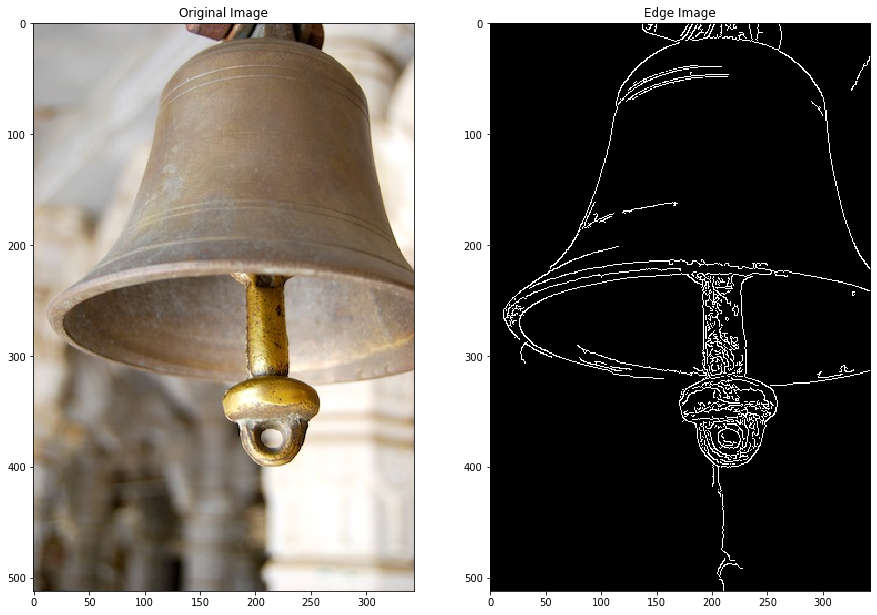

In [3]:
img = cv2.imread('./res/bell.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
out = cv2.Canny(img, 50, 190)
showImages(img, out)

> The best values for the Bell image are (50, 190) where most of the edges are preserved and noise is low.

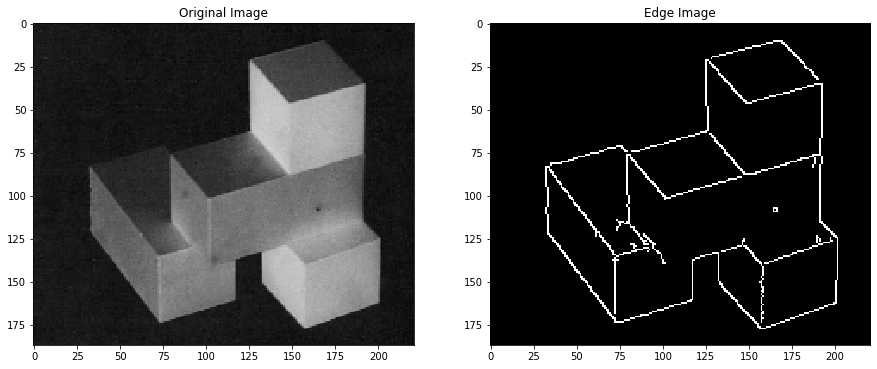

In [4]:
img = cv2.imread('./res/cubes.png')
out = cv2.Canny(img, 55, 195)
showImages(img, out)

> The best values for the Cube image are (55, 195) where most of the edges are preserved and noise is low.

# 2. Different Filters

## Prewitt filter

In [5]:
def prewitt(img):
    filterX = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    filterY = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
    mx = applyFilt(img, filterX)
    my = applyFilt(img, filterY)
    pwt = np.sqrt(mx*mx + my*my)
    return np.uint8(pwt)

## Sobel Filter

In [6]:
def sobel(img):
    filterX = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    filterY = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    mx = applyFilt(img, filterX)
    my = applyFilt(img, filterY)

    sob = np.sqrt(mx*mx + my*my)
    return np.uint8(sob) 

## Roberts filter

In [7]:
def roberts(img):
    filterX = np.array([[0, 1], [-1, 0]])
    filterY = np.array([[1, 0], [0, -1]])
    mx = applyFilt(img, filterX)
    my = applyFilt(img, filterY)

    rob = np.sqrt(mx*mx + my*my)
    return np.uint8(rob)

## Laplacian Filter

In [8]:
def laplacian(img):
    filt = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
    lap = applyFilt(img, filt)
    return np.uint8(np.clip(lap,0,255))

In [9]:
def laplacianDiag(img):
    filt = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]])
    lap = applyFilt(img, filt)
    return np.uint8(np.clip(lap,0,255))

## Applying all Filters

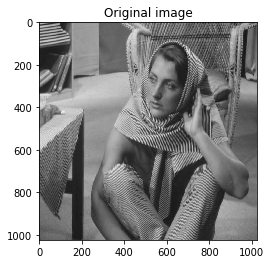

In [10]:
img = cv2.imread('./res/barbara.jpg')
plt.imshow(img,cmap = 'gray')
plt.title('Original image')
plt.show()

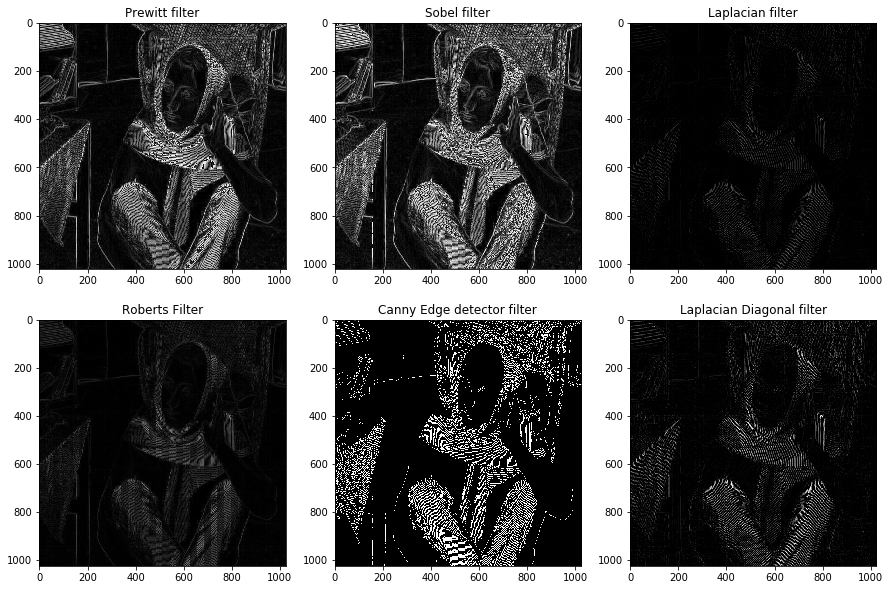

In [11]:
pwt = prewitt(img)
sob = sobel(img)
rob = roberts(img)
lap = laplacian(img)
lapd = laplacianDiag(img)
can = cv2.Canny(img, 40, 160)

arr = plt.subplots(2,3, figsize =(15,10))[1]
arr[0][0].imshow(pwt, cmap = 'gray')
arr[0][0].set_title('Prewitt filter')
arr[0][1].imshow(sob, cmap = 'gray')
arr[0][1].set_title('Sobel filter')
arr[0][2].imshow(lap, cmap = 'gray')
arr[0][2].set_title('Laplacian filter')

arr[1][0].imshow(rob, cmap = 'gray')
arr[1][0].set_title('Roberts Filter')
arr[1][1].imshow(can, cmap = 'gray')
arr[1][1].set_title('Canny Edge detector filter')
arr[1][2].imshow(lapd, cmap = 'gray')
arr[1][2].set_title('Laplacian Diagonal filter')

plt.show()

## Observations :-
 - Sobel performs better over Prewitt as Sobel gives more weightage to the middle part as compared to Prewitt which gives equal weights.
 - Roberts is a 2x2 diagonal filter, So the edges are not as detailed but still it works good.
 - Laplacian Diagonal is better because it takes in consideration the corners as well.
 - Canny Edge detector gives a nice outline with appropriate min and max values but doesn't give results as good as Sobel.

# 3. Adding Gaussian noise

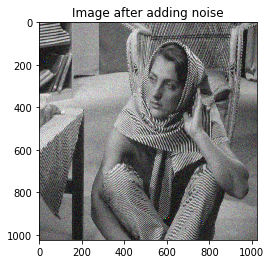

In [12]:
img = cv2.imread('./res/barbara.jpg')
gauss = np.random.normal(0, 10, img.shape)
img = np.uint8(img + gauss)

plt.imshow(img, cmap = 'gray')
plt.title('Image after adding noise')
plt.show()

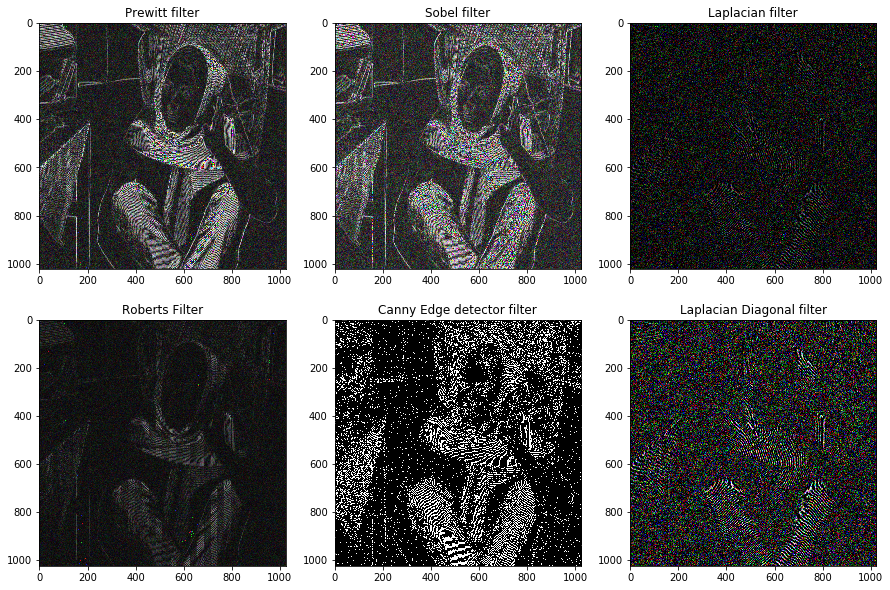

In [13]:
pwt = prewitt(img)
sob = sobel(img)
rob = roberts(img)
lap = laplacian(img)
lapd = laplacianDiag(img)
can = cv2.Canny(img, 120, 140)

arr = plt.subplots(2,3, figsize =(15,10))[1]
arr[0][0].imshow(pwt, cmap = 'gray')
arr[0][0].set_title('Prewitt filter')
arr[0][1].imshow(sob, cmap = 'gray')
arr[0][1].set_title('Sobel filter')
arr[0][2].imshow(lap, cmap = 'gray')
arr[0][2].set_title('Laplacian filter')

arr[1][0].imshow(rob, cmap = 'gray')
arr[1][0].set_title('Roberts Filter')
arr[1][1].imshow(can, cmap = 'gray')
arr[1][1].set_title('Canny Edge detector filter')
arr[1][2].imshow(lapd, cmap = 'gray')
arr[1][2].set_title('Laplacian Diagonal filter')

plt.show()

## Observations after adding noise:-

- Prewitt, Sobel and Roberts don't get much affected because they take gradients along x and y directions and then take l2 norm.
- Laplacian performs poorly because it takes the value of pixel and subtracts the value of neighbourhood. So, in case of noise it gives very poor results.
- Canny performs quite bad as it gives a lot of noise in the output.